# Eye Heuristics
The data has two normal distributions where one is for images with eyes and one is for images without.

In [125]:
import SimpleITK as sitk
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import glob
import os
import pickle
import numpy as np

In [96]:
IMG_SAVE_DIR = "img_viz"
IMG_VIZ_EXT = "png"

In [97]:
all_subject_dirs = glob.glob(os.path.join(EYE_DIR,'*'))
all_subject_ids = [ os.path.basename(sd) for sd in all_subject_dirs]

In [98]:
img_files = glob.glob("./img_viz/*/*")

In [99]:
average_intensities = []
for imf in img_files:
    im = sitk.ReadImage(imf)
    arr = sitk.GetArrayFromImage(im)
    average_intensities.append(np.average(arr.flatten()))

(array([ 3.,  4., 16., 14., 32., 39., 41., 51., 37., 44., 34., 25., 23.,
        20., 11., 11., 11.,  3.,  6.,  4.,  3.,  3.,  1.,  2.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  1.,  3.,  2.,  1.,  0.,  3.,  1.,
         1.,  4.,  6.,  4.,  7.,  7., 11., 13., 16., 18., 16., 29., 31.,
        33., 35., 35., 24., 45., 33., 43., 43., 37., 46., 57., 46., 52.,
        47., 41., 38., 43., 35., 28., 26., 35., 21., 21., 15., 19., 23.,
        12.,  9.,  9.,  8.,  7.,  2.,  4.,  3.,  0.,  4.,  4.,  2.,  2.,
         1.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([ 71.14583333,  71.93715   ,  72.72846667,  73.51978333,
         74.3111    ,  75.10241667,  75.89373333,  76.68505   ,
         77.47636667,  78.26768333,  79.059     ,  79.85031667,
         80.64163333,  81.43295   ,  82.22426667,  83.01558333,
         83.8069    ,  84.59821667,  85.38953333,  86.18085   ,
         86.97216667,  87.76348333,  88.5548    ,  89.34611667,
         90.13743333,  90.92875   ,  91.72006667, 

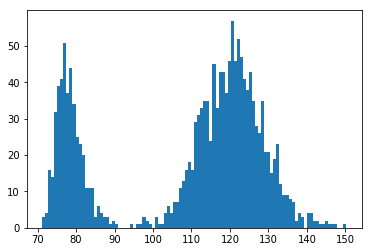

In [100]:
plt.hist(average_intensities,bins=100)

In [101]:
LE_data = glob.glob("./img_viz/LE/*")
LE_data.sort()
RE_data = glob.glob("./img_viz/RE/*")
RE_data.sort()

In [102]:
with open("./failed_le.list",'r') as f:
    LE_fails = f.readlines()
with open("./failed_re.list",'r') as f:
    RE_fails = f.readlines()

In [103]:
LE_fails = [a.split('\n')[0] for a in LE_fails[1:]]
LE_fails.sort()
RE_fails = [a.split('\n')[0] for a in RE_fails[1:]]
RE_fails.sort()

### prep features

In [108]:
features = []
for image_fn in LE_data:
    features.append(np.average(sitk.GetArrayFromImage(sitk.ReadImage(image_fn)).flatten()))
for image_fn in RE_data:
    features.append(np.average(sitk.GetArrayFromImage(sitk.ReadImage(image_fn)).flatten()))
features = np.array(features)
features = np.reshape(features, (-1,1))
print(features.shape)

(1610, 1)


### prep labels

In [109]:
labels = []
for sub in all_subject_ids:
    labels.append(sub in LE_fails)
for sub in all_subject_ids:
    labels.append(sub in RE_fails)
labels = np.array(labels)
labels = np.reshape(labels, (-1,1))
print(labels.shape)

(1610, 1)


### train test split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, shuffle=True, test_size=0.33)

In [135]:
clf = DecisionTreeClassifier(max_depth=1)  # only one decision
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
print("accuracy {}%".format(clf.score(x_test, y_test)*100))

accuracy 99.81203007518798%


In [137]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       390
        True       0.99      1.00      1.00       142

   micro avg       1.00      1.00      1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



In [140]:
with open("./classifier.pickle", 'wb') as f:
    pickle.dump(clf, f)

In [142]:
clf.predict([[3.4]])

array([ True])